In [17]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

from keras import Sequential
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from livelossplot import PlotLossesKeras

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize data shape

In [19]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

print(np.unique(y_test))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[0 1 2 3 4 5 6 7 8 9]


# Display one of the samples

In [4]:
#pick a sample
image_idx=int(X_train.shape[0]/2)
picture = X_train[image_idx]
print(picture.shape)
#picture = picture.reshape(28,28) 

(28, 28)


In [5]:
# Display the sample label
lbl = y_train[image_idx]
print(f"Sample {image_idx}, label = {y_train[image_idx]}")

Sample 30000, label = 3


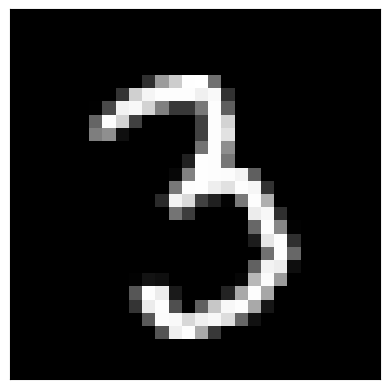

In [6]:
# Display the handwritten digit image
plt.imshow(picture, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show() 

# Reshape the data. Images are 28x28 and 1 Channel (gray scale)

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Normalize the data between 0 and 1 (colors are coded from 0 to 255 so just divide by 255)

In [8]:
X_train = X_train/255
X_test = X_test/255

### Define the CNN Architecture

In [9]:
# model = Sequential()

# # CNN
# # Convolutional Layer
# model.add(Conv2D(28, (3, 3), input_shape=(28, 28, 1), activation='relu'))
# # Max Pooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))
# #add flattening layer
# model.add(Flatten())


# # ANN
# model.add(Dense(units=128, activation='relu'))

# #add a dense hidden layer
# #model.add(Dense(units=64, activation='relu'))

# #add softmax activation on dense layer for output
# model.add(Dense(units=10, activation='softmax'))

In [10]:
# Test Accuracy = 0.9937000274658203

model = Sequential()

# Convolutional Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer
model.add(Dropout(rate=0.25))

# Convolutional Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 3), activation='relu'))
# Convolutional Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 3), activation='relu'))
# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer
model.add(Dropout(rate=0.25))

#add flattening layer
model.add(Flatten())

# Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))

# Full connection
model.add(Dense(units = 128, activation = 'relu'))

# Output layer
model.add(Dense(units=10, activation='softmax'))

# Compile CNN

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                  

# Train the CNN

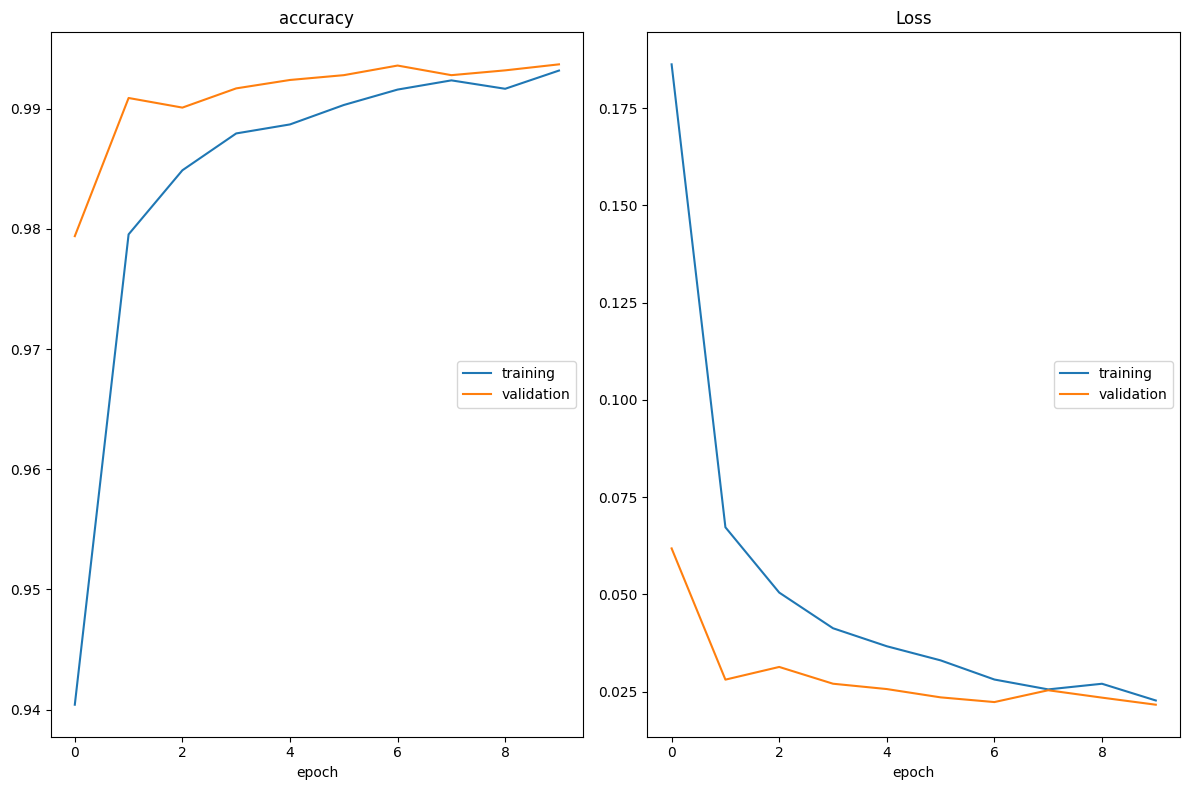

accuracy
	training         	 (min:    0.940, max:    0.993, cur:    0.993)
	validation       	 (min:    0.979, max:    0.994, cur:    0.994)
Loss
	training         	 (min:    0.023, max:    0.186, cur:    0.023)
	validation       	 (min:    0.022, max:    0.062, cur:    0.022)


In [12]:
model.fit(X_train, y_train,
          epochs=10,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

In [13]:
# get the model's performance
loss, accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0216 - accuracy: 0.9937


In [14]:
print(f"Loss (sparse_categorical_crossentropy) = {loss}")
print(f"Accuracy = {accuracy}")

Loss (sparse_categorical_crossentropy) = 0.02162771299481392
Accuracy = 0.9937000274658203
